In [1]:
%cd ..

D:\personal_work\mlops-zoomcamp-final-project


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.prepare_dataset import read_dataset

df = read_dataset()

df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.shape

(62630, 16)

In [6]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [7]:
numerical = ["Temperature[C]", "Humidity[%]"]
target = "Fire Alarm"
X = df[numerical].values
y = df[target].values

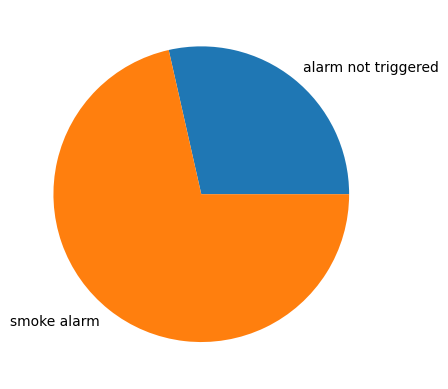

In [8]:
# plt.pie(y[:200].astype("int"))

# y[:200].astype("int")
plt.pie(
    np.array([(y==0).sum(), (y==1).sum()]),
    labels=["alarm not triggered", "smoke alarm"]
)
plt.show()

In [9]:
X.shape

(62630, 2)

In [11]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(50104, 2) (50104,)
(12526, 2) (12526,)


## Model

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X=X_train, y=y_train)

LogisticRegression()

In [20]:
score = model.score(X_train, y_train) * 100
print(f"Training Accuracy: {score:.4f}")
score = model.score(X_val, y_val) * 100
print(f"Validation Accuracy: {score:.4f}")

Training Accuracy: 77.0557
Validation Accuracy: 76.4490


              precision    recall  f1-score   support

           0       0.82      0.25      0.38     14279
           1       0.77      0.98      0.86     35825

    accuracy                           0.77     50104
   macro avg       0.79      0.61      0.62     50104
weighted avg       0.78      0.77      0.72     50104



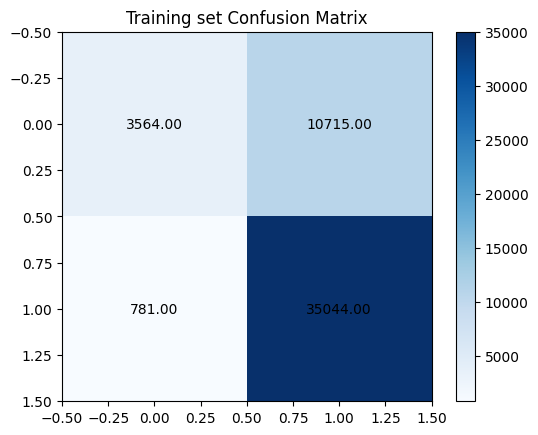

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

print(classification_report(y_train, y_pred))
plt.figure()
plt.title("Training set Confusion Matrix")
plt.imshow(cm, cmap="Blues")
plt.colorbar()
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, "{:0.2f}".format(value), ha='center', va='center')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.24      0.37      3594
           1       0.76      0.97      0.86      8932

    accuracy                           0.76     12526
   macro avg       0.78      0.61      0.61     12526
weighted avg       0.77      0.76      0.72     12526



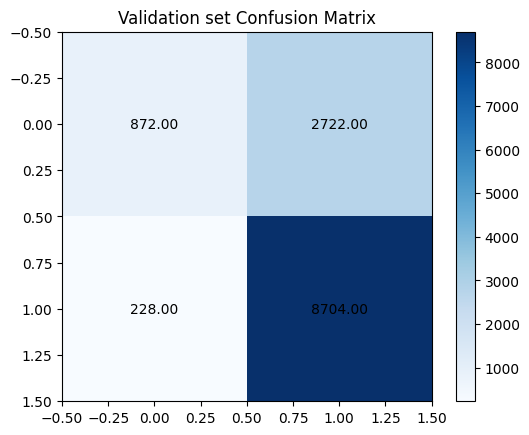

In [43]:
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

print(classification_report(y_val, y_pred))
plt.figure()
plt.title("Validation set Confusion Matrix")
plt.imshow(cm, cmap="Blues")
plt.colorbar()
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, "{:0.2f}".format(value), ha='center', va='center')
plt.show()